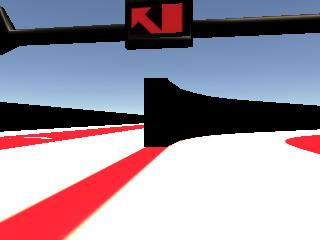

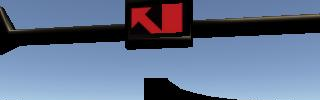

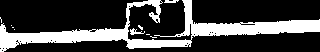

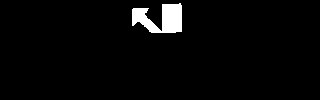

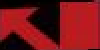

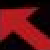

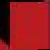

'L'

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def get_support_coordinate(img):
  img_hsv = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(img_hsv, (0, 0, 0),(255,255,10))
  _, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
      area = cv2.contourArea(cnt)        
      x, y, w, h = cv2.boundingRect(cnt)        
      if area > 1000:
        #print(area)
        #print(x, y, w, h)
        temp_mask = mask[y:y + h, x:x + w].copy()        
        cv2_imshow(temp_mask)
        print(' ')
        return x, y, w, h   
  

def get_traffic_signs_image(support_x,support_y,img):  
  img_hsv = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2HSV)
  r1_mask = cv2.inRange(img_hsv, (0,100,120), (10,255,255))
  r2_mask = cv2.inRange(img_hsv, (170,100,120), (180,255,255))
  mask = np.repeat((r1_mask | r2_mask)[:, :, np.newaxis], 3, axis=2)
  cv2_imshow(mask)
  print(' ')
  img_masked = img.copy()
  img_masked[mask == 0] = 0       
  _,contours, hierarchy	= cv2.findContours((r1_mask|r2_mask), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  run = 0
  for cnt in contours:    
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)    
    #print(x,y,w,h)
    if w > 13 and h > 5:
      if support_x < x and support_y < y :
        cv2.drawContours(img.copy(), [cnt], -1, (255, 0, 0), -1)
        cv2.rectangle(img.copy(),(x,y),(x+w,y+h),(255,255,255),1)
        cut_image = img[y:y+h,x:x+w].copy()
        resize = cv2.resize(img[y:y+h,x:x+w].copy(), (100, 50), interpolation=cv2.INTER_NEAREST)
        cv2_imshow(resize)
        print(' ')
        img_left = cv2.cvtColor(cv2.cvtColor(resize[0:50, 0:50] , cv2.COLOR_HSV2BGR) ,cv2.COLOR_BGR2GRAY)
        cv2_imshow(resize[0:50, 0:50])
        print(' ')
        img_right = cv2.cvtColor(cv2.cvtColor(resize[0:50, 50:100] , cv2.COLOR_HSV2BGR) ,cv2.COLOR_BGR2GRAY) 
        cv2_imshow(resize[0:50, 50:100])
        print(' ')
        left_count = cv2.countNonZero(img_left)
        right_count = cv2.countNonZero(img_right)   
        #print('lr count:', left_count, right_count)
        if abs(left_count - right_count) > 5:
            have_traffic_sign = True
            if left_count > right_count:
                return 'R'
            else:
                return 'L'                
  
  
signs_color_range = [(0, 0, 0),(255,255,10)]
img = cv2.imread('1.jpg')
cv2_imshow(img)
print(' ')
img = img[0:100, 0:320]
cv2_imshow(img)
print(' ')
support_x,support_y,support_w,support_h = get_support_coordinate(img)
#print('support',support_x,support_y,support_w,support_h)
get_traffic_signs_image(support_x,support_y,img)

